In [27]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [28]:
mnist = keras.datasets.mnist
(X_train_full, y_train_full),(X_test,y_test) = mnist.load_data()

In [29]:
X_valid, X_train = X_train_full[:5000] / 255, X_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255

In [30]:
class_names = ["0","1","2","3","4","5","6","7","8","9"]

In [47]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

In [48]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

## Early stopping

In [49]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', min_delta=0.05, verbose=1, patience=5, restore_best_weights=True)


In [50]:
history = model.fit(X_train, y_train, epochs=30, validation_data = (X_valid, y_valid), batch_size=32, callbacks=[early_stopping])


Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6109 - accuracy: 0.8390 - val_loss: 0.3157 - val_accuracy: 0.9114
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2863 - accuracy: 0.9187 - val_loss: 0.2371 - val_accuracy: 0.9342
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2326 - accuracy: 0.9330 - val_loss: 0.1968 - val_accuracy: 0.9460
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1979 - accuracy: 0.9433 - val_loss: 0.1710 - val_accuracy: 0.9520
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1731 - accuracy: 0.9505 - val_loss: 0.1533 - val_accuracy: 0.9586
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1533 - accuracy: 0.9559 - val_loss: 0.1483 - val_accuracy: 0.9604
Epoch 00006: early stopping


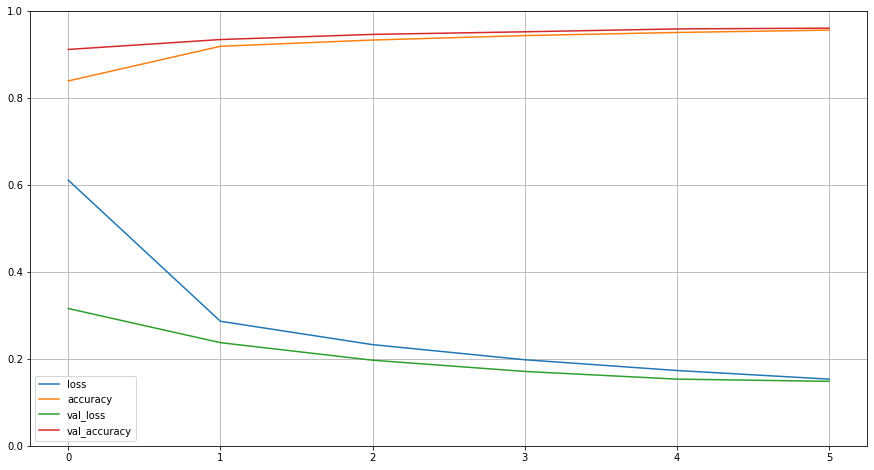

In [51]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(15,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()